In [49]:
pip install numpy==1.19.5

  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.2
    Uninstalling numpy-1.21.2:
      Successfully uninstalled numpy-1.21.2
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\Dima\\anaconda3\\envs\\tf-2\\Lib\\site-packages\\~umpy\\core\\_multiarray_tests.cp38-win_amd64.pyd'
Consider using the `--user` option or check the permissions.



In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np



In [2]:
x = np.linspace(0, 50, 501)

In [3]:
#x

In [4]:
y = np.sin(x)

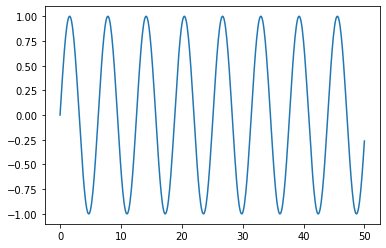

In [5]:
plt.plot(x,y)

In [6]:
df = pd.DataFrame(data = y, index=x, columns=['Sine'])

In [7]:
df

,Sine
0.0,0.000000
0.1,0.099833
0.2,0.198669
0.3,0.295520
0.4,0.389418
...,...
49.6,-0.617439
49.7,-0.535823
49.8,-0.448854
49.9,-0.357400


In [8]:
len(df)

501

In [9]:
test_percent = 0.1

In [10]:
len(df)*test_percent #10% of the data points

50.1

In [11]:
test_point = np.round(len(df)*test_percent)

In [12]:
test_ind = int(len(df) - test_point)

In [13]:
test_ind

451

In [14]:
train = df.iloc[:test_ind]

In [15]:
test = df.iloc[test_ind:]

In [16]:
test

,Sine
45.1,0.899097
45.2,0.938307
45.3,0.968142
45.4,0.988304
45.5,0.998591
45.6,0.998900
45.7,0.989229
45.8,0.969673
45.9,0.940429
46.0,0.901788


In [17]:
train

,Sine
0.0,0.000000
0.1,0.099833
0.2,0.198669
0.3,0.295520
0.4,0.389418
...,...
44.6,0.579164
44.7,0.657656
44.8,0.729577
44.9,0.794208


In [18]:
from sklearn.preprocessing import MinMaxScaler

In [19]:
scaler = MinMaxScaler()

In [20]:
scaler.fit(train)

MinMaxScaler()

In [21]:
scaled_train = scaler.transform(train)

In [22]:
scaled_test = scaler.transform(test)

In [23]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [24]:
help(TimeseriesGenerator)

Help on class TimeseriesGenerator in module tensorflow.python.keras.preprocessing.sequence:

class TimeseriesGenerator(keras_preprocessing.sequence.TimeseriesGenerator, tensorflow.python.keras.utils.data_utils.Sequence)
 |  TimeseriesGenerator(data, targets, length, sampling_rate=1, stride=1, start_index=0, end_index=None, shuffle=False, reverse=False, batch_size=128)
 |  
 |  Utility class for generating batches of temporal data.
 |  
 |  This class takes in a sequence of data-points gathered at
 |  equal intervals, along with time series parameters such as
 |  stride, length of history, etc., to produce batches for
 |  training/validation.
 |  # Arguments
 |      data: Indexable generator (such as list or Numpy array)
 |          containing consecutive data points (timesteps).
 |          The data should be at 2D, and axis 0 is expected
 |          to be the time dimension.
 |      targets: Targets corresponding to timesteps in `data`.
 |          It should have same length as `data`

In [25]:
lenght = 50
batch_size = 1


In [26]:
time_gen = TimeseriesGenerator(data = scaled_train, 
                               targets = scaled_train,
                              length=lenght, batch_size=batch_size)

In [27]:
len(scaled_train)

451

In [28]:
len(time_gen) # 451- lenght(2)

401

In [29]:
X, y = time_gen[0]

In [30]:
X

array([[[4.99999116e-01],
        [5.49916225e-01],
        [5.99334579e-01],
        [6.47760405e-01],
        [6.94709850e-01],
        [7.39713809e-01],
        [7.82322618e-01],
        [8.22110545e-01],
        [8.58680040e-01],
        [8.91665714e-01],
        [9.20737985e-01],
        [9.45606372e-01],
        [9.66022399e-01],
        [9.81782075e-01],
        [9.92727935e-01],
        [9.98750612e-01],
        [9.99789928e-01],
        [9.95835500e-01],
        [9.86926839e-01],
        [9.73152957e-01],
        [9.54651478e-01],
        [9.31607263e-01],
        [9.04250562e-01],
        [8.72854714e-01],
        [8.37733417e-01],
        [7.99237589e-01],
        [7.57751870e-01],
        [7.13690771e-01],
        [6.67494535e-01],
        [6.19624741e-01],
        [5.70559686e-01],
        [5.20789614e-01],
        [4.70811810e-01],
        [4.21125636e-01],
        [3.72227539e-01],
        [3.24606094e-01],
        [2.78737119e-01],
        [2.35078919e-01],
        [1.9

In [31]:
y #predicted the next point based on the lenght

array([[0.02053313]])

In [32]:
#scaled_train

In [33]:
from tensorflow.keras.models import Sequential

In [34]:
from tensorflow.keras.layers import Dense, SimpleRNN, LSTM

In [35]:
n_features = 1

In [36]:
model = Sequential()
model.add(SimpleRNN(25, input_shape = (lenght, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss = 'mse')

In [38]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn (SimpleRNN)       (None, 25)                675       
_________________________________________________________________
dense (Dense)                (None, 1)                 26        
Total params: 701
Trainable params: 701
Non-trainable params: 0
_________________________________________________________________


In [39]:
model.fit_generator(time_gen, epochs=5)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/5
401/401 [==============================] - 3s 6ms/step - loss: 0.0027
Epoch 2/5
401/401 [==============================] - 2s 5ms/step - loss: 1.6007e-04
Epoch 3/5
401/401 [==============================] - 2s 5ms/step - loss: 7.3790e-05
Epoch 4/5
401/401 [==============================] - 2s 5ms/step - loss: 9.5868e-05
Epoch 5/5
401/401 [==============================] - 2s 6ms/step - loss: 1.5749e-04


In [40]:
loss = pd.DataFrame(model.history.history)

<AxesSubplot:>

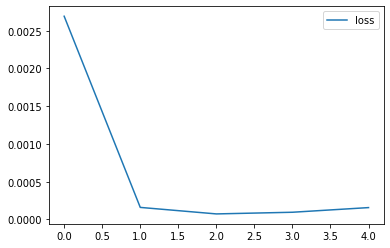

In [41]:
loss.plot()

In [42]:
first_eval_batch = scaled_train[-lenght:]

In [43]:
first_eval_batch = first_eval_batch.reshape((1, lenght,n_features))

In [44]:
model.predict(first_eval_batch)

array([[0.95226455]], dtype=float32)

In [45]:
scaled_test[0]

array([0.94955134])

In [51]:
test_predictions = []
first_eval_batch = scaled_train[-lenght:]
current_batch = first_eval_batch.reshape((1,lenght,n_features))
for i in range (len(test)):
    current_pred = model.predict(current_batch)[0]
    test_predictions.append(current_pred)
    current_batch = np.append(current_batch[:,1:,:], [[current_pred]], axis =1)


In [52]:
#np.append(current_batch[:,1:,:])

In [53]:
test_predictions

[array([0.95226455], dtype=float32),
 array([0.9712882], dtype=float32),
 array([0.98630506], dtype=float32),
 array([0.99616486], dtype=float32),
 array([1.0003679], dtype=float32),
 array([0.998818], dtype=float32),
 array([0.99319625], dtype=float32),
 array([0.9812316], dtype=float32),
 array([0.9654684], dtype=float32),
 array([0.94539607], dtype=float32),
 array([0.9214429], dtype=float32),
 array([0.89367133], dtype=float32),
 array([0.8639069], dtype=float32),
 array([0.83033663], dtype=float32),
 array([0.7955933], dtype=float32),
 array([0.758629], dtype=float32),
 array([0.7200448], dtype=float32),
 array([0.68007016], dtype=float32),
 array([0.6398493], dtype=float32),
 array([0.59767205], dtype=float32),
 array([0.55625194], dtype=float32),
 array([0.51386666], dtype=float32),
 array([0.47181788], dtype=float32),
 array([0.42968726], dtype=float32),
 array([0.3890753], dtype=float32),
 array([0.34811667], dtype=float32),
 array([0.30983397], dtype=float32),
 array([0.27209

In [54]:
scaled_test

array([[9.49551344e-01],
       [9.69156618e-01],
       [9.84074225e-01],
       [9.94155114e-01],
       [9.99298559e-01],
       [9.99453170e-01],
       [9.94617400e-01],
       [9.84839568e-01],
       [9.70217371e-01],
       [9.50896908e-01],
       [9.27071224e-01],
       [8.98978376e-01],
       [8.66899060e-01],
       [8.31153800e-01],
       [7.92099752e-01],
       [7.50127132e-01],
       [7.05655314e-01],
       [6.59128649e-01],
       [6.11012013e-01],
       [5.61786173e-01],
       [5.11942978e-01],
       [4.61980443e-01],
       [4.12397778e-01],
       [3.63690397e-01],
       [3.16344967e-01],
       [2.70834550e-01],
       [2.27613868e-01],
       [1.87114770e-01],
       [1.49741909e-01],
       [1.15868702e-01],
       [8.58335998e-02],
       [5.99367021e-02],
       [3.84367625e-02],
       [2.15486014e-02],
       [9.44095974e-03],
       [2.23481297e-03],
       [2.16257798e-06],
       [2.76531647e-03],
       [1.04966661e-02],
       [2.31189624e-02],


In [55]:
true_preddictions = scaler.inverse_transform(test_predictions)

In [56]:
test['Predictions'] = true_preddictions

C:\Users\Dima\AppData\Local\Temp/ipykernel_2924/2057943675.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Predictions'] = true_preddictions


In [57]:
test

,Sine,Predictions
45.1,0.899097,0.904524
45.2,0.938307,0.942571
45.3,0.968142,0.972604
45.4,0.988304,0.992324
45.5,0.998591,1.000729
45.6,0.998900,0.997630
45.7,0.989229,0.986386
45.8,0.969673,0.962457
45.9,0.940429,0.930931
46.0,0.901788,0.890787


<AxesSubplot:>

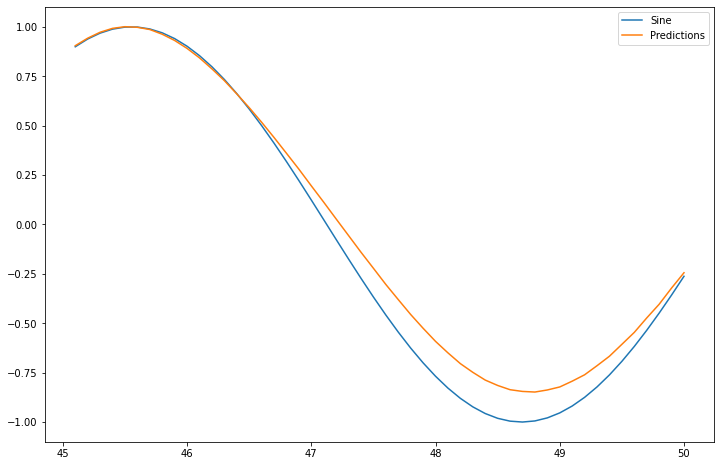

In [58]:
test.plot(figsize = (12,8))

In [59]:
from tensorflow.keras.callbacks import EarlyStopping

In [60]:
early_stop = EarlyStopping(monitor = 'val_loss', patience=2)

In [66]:
length = 49
generator = TimeseriesGenerator(scaled_train, scaled_train,
                               length=length, batch_size = 1)

validation_generator = TimeseriesGenerator(scaled_test, scaled_test,
                                          length = length, batch_size=1)

In [67]:
model = Sequential()
model.add(LSTM(25, input_shape = (lenght, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss = 'mse')

In [68]:
model.fit_generator(generator, epochs=20,
                   validation_data=validation_generator,
                   callbacks=[early_stop])

Epoch 1/20
402/402 [==============================] - 8s 20ms/step - loss: 0.0084 - val_loss: 5.7969e-05
Epoch 2/20
402/402 [==============================] - 8s 19ms/step - loss: 8.6944e-05 - val_loss: 3.6769e-05
Epoch 3/20
402/402 [==============================] - 8s 19ms/step - loss: 9.2699e-05 - val_loss: 2.0231e-05
Epoch 4/20
402/402 [==============================] - 7s 18ms/step - loss: 1.1761e-04 - val_loss: 1.3749e-05
Epoch 5/20
402/402 [==============================] - 7s 17ms/step - loss: 9.4329e-05 - val_loss: 2.2055e-06
Epoch 6/20
402/402 [==============================] - 7s 18ms/step - loss: 2.0561e-04 - val_loss: 7.2756e-07
Epoch 7/20
402/402 [==============================] - 7s 18ms/step - loss: 1.9886e-05 - val_loss: 5.4148e-06
Epoch 8/20
402/402 [==============================] - 7s 17ms/step - loss: 8.8715e-06 - val_loss: 1.0886e-06


In [72]:
test_predictions = []
first_eval_batch = scaled_train[-lenght:]
current_batch = first_eval_batch.reshape((1,lenght,n_features))
for i in range (len(test)):
    current_pred = model.predict(current_batch)[0]
    test_predictions.append(current_pred)
    current_batch = np.append(current_batch[:,1:,:], [[current_pred]], axis =1)


C:\Users\Dima\AppData\Local\Temp/ipykernel_2924/2202058490.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['LSTM Predictions'] = true_preddictions


<AxesSubplot:>

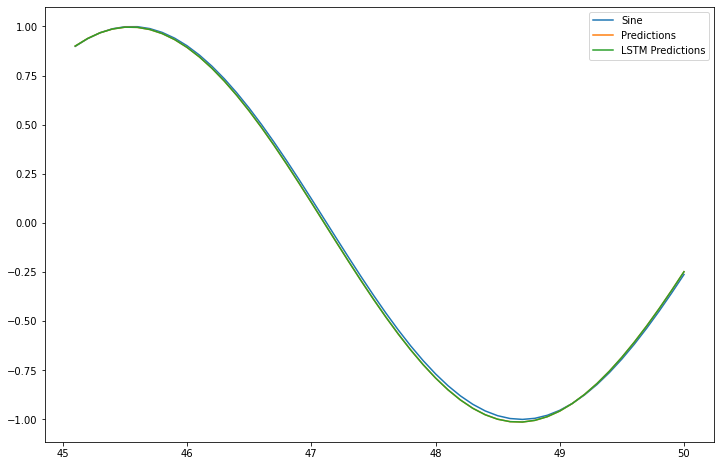

In [73]:
true_preddictions = scaler.inverse_transform(test_predictions)
test['LSTM Predictions'] = true_preddictions
test.plot(figsize = (12,8))

<AxesSubplot:>

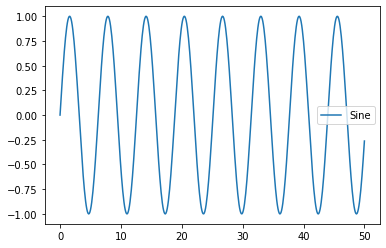

In [74]:
df.plot()

In [76]:
full_scaler = MinMaxScaler()
scaled_full_data = full_scaler.fit_transform(df)

In [77]:
generator = TimeseriesGenerator(scaled_full_data, scaled_full_data, length=length, batch_size=1)

In [78]:
model = Sequential()
model.add(LSTM(25, input_shape = (lenght, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss = 'mse')

In [79]:
model.fit_generator(generator, epochs=8)

Epoch 1/8
452/452 [==============================] - 7s 16ms/step - loss: 0.0225
Epoch 2/8
452/452 [==============================] - 9s 19ms/step - loss: 7.9924e-05: 0s - loss: 8.12
Epoch 3/8
452/452 [==============================] - 8s 18ms/step - loss: 5.1427e-05
Epoch 4/8
452/452 [==============================] - 8s 17ms/step - loss: 5.4739e-05
Epoch 5/8
452/452 [==============================] - 9s 19ms/step - loss: 1.0168e-04
Epoch 6/8
452/452 [==============================] - 8s 18ms/step - loss: 4.2170e-05
Epoch 7/8
452/452 [==============================] - 8s 18ms/step - loss: 4.8223e-05
Epoch 8/8
452/452 [==============================] - 7s 16ms/step - loss: 1.5346e-04


In [84]:
forecast = []
first_eval_batch = scaled_train[-lenght:]
current_batch = first_eval_batch.reshape((1,lenght,n_features))
for i in range (25):
    current_pred = model.predict(current_batch)[0]
    forecast.append(current_pred)
    current_batch = np.append(current_batch[:,1:,:], [[current_pred]], axis =1)


In [85]:
forecast = scaler.inverse_transform(forecast)

In [86]:
df

,Sine
0.0,0.000000
0.1,0.099833
0.2,0.198669
0.3,0.295520
0.4,0.389418
...,...
49.6,-0.617439
49.7,-0.535823
49.8,-0.448854
49.9,-0.357400


In [87]:
forecast_index = np.arange(50.1, 52.6, step = 0.1)

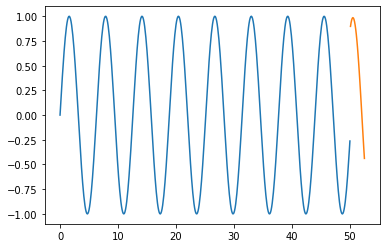

In [88]:
plt.plot(df.index, df['Sine'])
plt.plot(forecast_index, forecast)